## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







In [113]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
data =  pd.read_csv('iris.data', header=None)
clusters = 4

In [115]:
data[4] = data[4].astype('category')
data[4] = data[4].cat.codes
x = data.iloc[:,:4]
y = data.iloc[:,-1]

## 1

In [116]:
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(x)
predkmeans = kmeans.predict(x)

aggclu = AgglomerativeClustering(n_clusters=clusters).fit(x)

In [117]:
print('homogeneity kmeans with {:d} clusters: {:f}'.format(clusters, metrics.homogeneity_score(y, predkmeans)))
print('completeness kmeans with {:d} clusters: {:f}'.format(clusters, metrics.completeness_score(y,predkmeans)))
print ('\n')
print('homogeneity agglomerative clustering with {:d} clusters: {:f}'.format(clusters, metrics.homogeneity_score(y, aggclu.labels_)))
print('completeness agglomerative clustering with {:d} clusters: {:f}'.format(clusters, metrics.completeness_score(y,aggclu.labels_)))

homogeneity kmeans with 4 clusters: 0.808314
completeness kmeans with 4 clusters: 0.652211


homogeneity agglomerative clustering with 4 clusters: 0.794794
completeness agglomerative clustering with 4 clusters: 0.641884


## 2

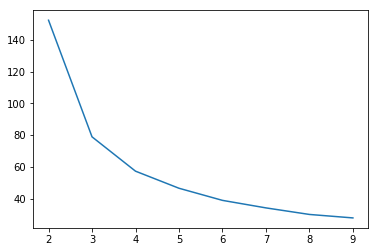

In [118]:
inertia = []
for i in xrange(2,10):
    kmeans.n_clusters = i
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
plt.plot(np.arange(2,10), inertia)
plt.show()

logo, seguindo o metodo do cotovelo, o melhor número de clusters serão 3

## 3

In [119]:
clusters = 3
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(x)
predkmeans = kmeans.predict(x)

aggclu = AgglomerativeClustering(n_clusters=clusters).fit(x)

In [120]:
print('homogeneity kmeans with {:d} clusters: {:f}'.format(clusters, metrics.homogeneity_score(y, predkmeans)))
print('completeness kmeans with {:d} clusters: {:f}'.format(clusters, metrics.completeness_score(y,predkmeans)))
print ('\n')
print('homogeneity agglomerative clustering with {:d} clusters: {:f}'.format(clusters, metrics.homogeneity_score(y, aggclu.labels_)))
print('completeness agglomerative clustering with {:d} clusters: {:f}'.format(clusters, metrics.completeness_score(y,aggclu.labels_)))

homogeneity kmeans with 3 clusters: 0.751485
completeness kmeans with 3 clusters: 0.764986


homogeneity agglomerative clustering with 3 clusters: 0.760801
completeness agglomerative clustering with 3 clusters: 0.779596
